In [ ]:
import openpiv

In [2]:
from openpiv import windef
from openpiv import tools, process, scaling, validation, filters, preprocess
import numpy as np

import os
# from time import time
import warnings


import matplotlib.pyplot as plt
%matplotlib inline

import pathlib

In [3]:
image_path = pathlib.Path(r'./2B_RectificatedFrames_Particles_50mmh')
res_path = pathlib.Path(r'./Results/Open_PIV_results_64_Particles_50mmh/')

In [4]:
file_list = []
for path in sorted(image_path.rglob('*.tif')):
    # print(f'{path.name}')
    file_list.append(path.name)

In [5]:
file_list

['Particles50_Raw_   1.tif',
 'Particles50_Raw_   2.tif',
 'Particles50_Raw_   3.tif',
 'Particles50_Raw_   4.tif',
 'Particles50_Raw_   5.tif',
 'Particles50_Raw_   6.tif',
 'Particles50_Raw_   7.tif',
 'Particles50_Raw_   8.tif',
 'Particles50_Raw_   9.tif',
 'Particles50_Raw_  10.tif']

In [6]:
settings = windef.Settings()


'Data related settings'
# Folder with the images to process
settings.filepath_images = image_path

# Folder for the outputs
settings.save_path = './Results/'

# Root name of the output Folder for Result Files
settings.save_folder_suffix = 'Particles_50mmh'

# Format and Image Sequence
settings.frame_pattern_a = '*.tif' # file_list[0]

# settings.frame_pattern_b = file_list[1]
settings.frame_pattern_b = None

# If you want only one pair
# settings.frame_pattern_a = file_list[0]
# settings.frame_pattern_b = file_list[1]

'Region of interest'
# (50,300,50,300) #Region of interest: (xmin,xmax,ymin,ymax) or 'full' for full image
settings.ROI = 'full' # (0,300,0,1024) #'full'

'Image preprocessing'
# 'None' for no masking, 'edges' for edges masking, 'intensity' for intensity masking
# WARNING: This part is under development so better not to use MASKS
settings.dynamic_masking_method = 'None'
settings.dynamic_masking_threshold = 0.005
settings.dynamic_masking_filter_size = 7

'Processing Parameters'
settings.correlation_method='circular'  # 'circular' or 'linear'
settings.iterations = 1  # select the number of PIV passes

# add the interroagtion window size for each pass. 
# For the moment, it should be a power of 2 
settings.windowsizes = (64,32,16) # if longer than n iteration the rest is ignored

# The overlap of the interroagtion window for each pass.
settings.overlap = (32,16,8) # This is 50% overlap
# Has to be a value with base two. In general window size/2 is a good choice.

# methode used for subpixel interpolation: 'gaussian','centroid','parabolic'
settings.subpixel_method = 'gaussian'

# order of the image interpolation for the window deformation
settings.interpolation_order = 3
settings.scaling_factor = 1  # scaling factor pixel/meter
settings.dt = 1  # time between to frames (in seconds)

# 'Signal to noise ratio options (only for the last pass)'
# It is possible to decide if the S/N should be computed (for the last pass) or not
settings.extract_sig2noise = False  # 'True' or 'False' (only for the last pass)

# method used to calculate the signal to noise ratio 'peak2peak' or 'peak2mean'
settings.sig2noise_method = 'peak2peak'

# select the width of the masked to masked out pixels next to the main peak
settings.sig2noise_mask = 1.2

# If extract_sig2noise==False the values in the signal to noise ratio
# output column are set to NaN

'vector validation options'

# choose if you want to do validation of the first pass: True or False
settings.validation_first_pass = True
# only effecting the first pass of the interrogation the following passes
# in the multipass will be validated

'Validation Parameters'
# The validation is done at each iteration based on three filters.
# The first filter is based on the min/max ranges. Observe that these values are defined in
# terms of minimum and maximum displacement in pixel/frames.
settings.MinMax_U_disp = (-50, 50)
settings.MinMax_V_disp = (-50, 50)

# The second filter is based on the global STD threshold
settings.std_threshold = 3  # threshold of the std validation

# The third filter is the median test (not normalized at the moment)
settings.median_threshold = 3  # threshold of the median validation

# On the last iteration, an additional validation can be done based on the S/N.
settings.median_size=1 #defines the size of the local median

'Validation based on the signal to noise ratio'
# Note: only available when extract_sig2noise==True and only for the last
# pass of the interrogation
# Enable the signal to noise ratio validation. Options: True or False
settings.do_sig2noise_validation = True # This is time consuming

# minmum signal to noise ratio that is need for a valid vector
settings.sig2noise_threshold = 2

'Outlier replacement or Smoothing options'

# Replacment options for vectors which are masked as invalid by the validation
settings.replace_vectors = True # Enable the replacment. Chosse: True or False
settings.smoothn=True #Enables smoothing of the displacemenet field
settings.smoothn_p = 0.5 # This is a smoothing parameter

# select a method to replace the outliers: 'localmean', 'disk', 'distance'
settings.filter_method = 'localmean'
# maximum iterations performed to replace the outliers
settings.max_filter_iteration = 4
settings.filter_kernel_size = 3  # kernel size for the localmean method

'Output options'
# Select if you want to save the plotted vectorfield: True or False
settings.save_plot = False
# Choose wether you want to see the vectorfield or not :True or False
settings.show_plot = False
settings.scale_plot = 50  # select a value to scale the quiver plot of the vectorfield
# run the script with the given settings

In [7]:
windef.piv(settings);

/Users/alexliberzon/opt/miniconda3/envs/drainage/lib/python3.7/site-packages/openpiv/windef.py:727: RuntimeWarning: divide by zero encountered in log
  subp_peak_position = (peak1_i + ((np.log(cl) - np.log(cr)) / (2 * np.log(cl) - 4 * np.log(c) + 2 * np.log(cr))),
/Users/alexliberzon/opt/miniconda3/envs/drainage/lib/python3.7/site-packages/openpiv/windef.py:727: RuntimeWarning: invalid value encountered in double_scalars
  subp_peak_position = (peak1_i + ((np.log(cl) - np.log(cr)) / (2 * np.log(cl) - 4 * np.log(c) + 2 * np.log(cr))),
/Users/alexliberzon/opt/miniconda3/envs/drainage/lib/python3.7/site-packages/openpiv/windef.py:728: RuntimeWarning: divide by zero encountered in log
  peak1_j + ((np.log(cd) - np.log(cu)) / (2 * np.log(cd) - 4 * np.log(c) + 2 * np.log(cu))))
/Users/alexliberzon/opt/miniconda3/envs/drainage/lib/python3.7/site-packages/openpiv/windef.py:728: RuntimeWarning: invalid value encountered in double_scalars
  peak1_j + ((np.log(cd) - np.log(cu)) / (2 * np.log(cd) 

Image Pair 1
Image Pair 2
Image Pair 3
Image Pair 4
Image Pair 5
Image Pair 6
Image Pair 7
Image Pair 8
Image Pair 9


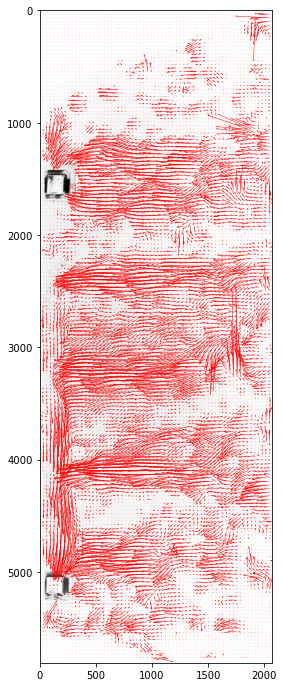

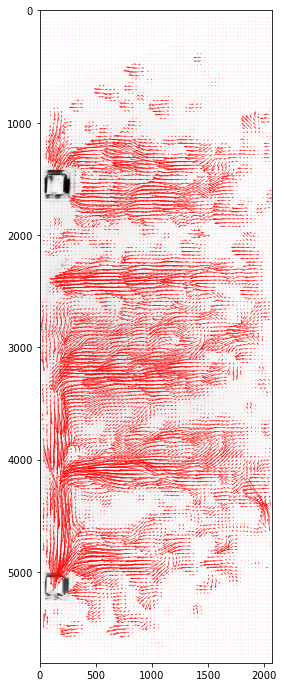

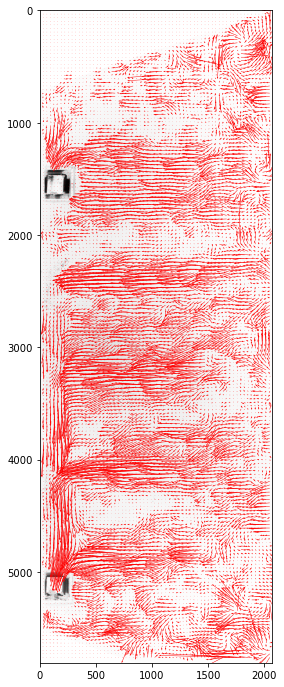

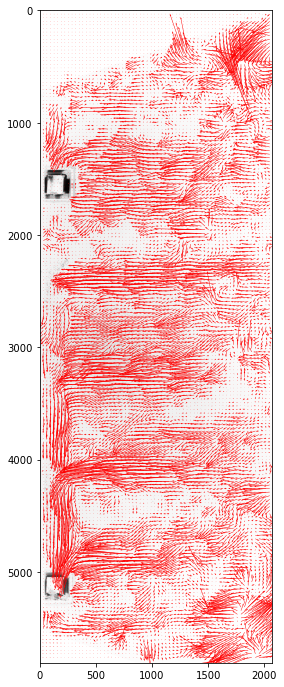

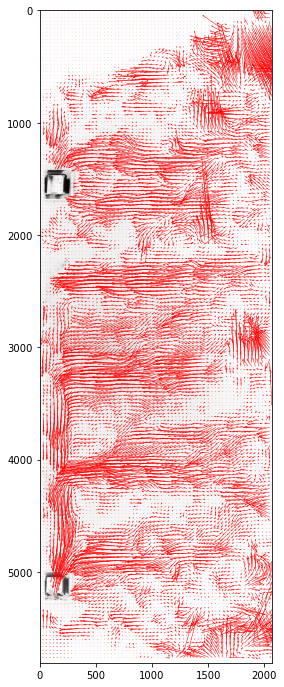

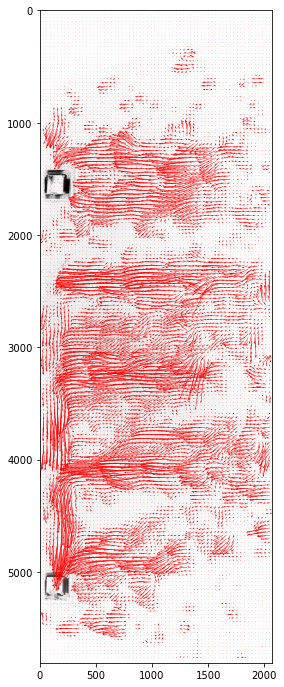

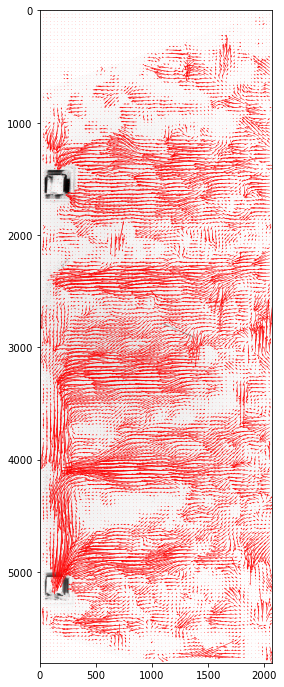

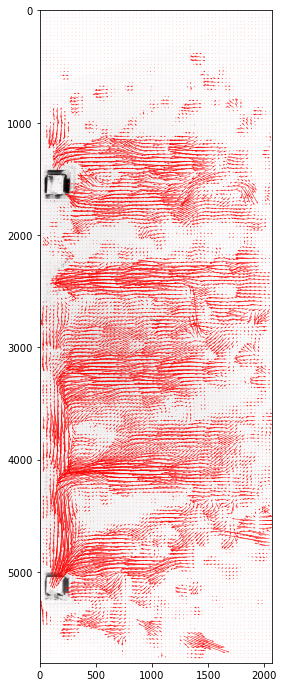

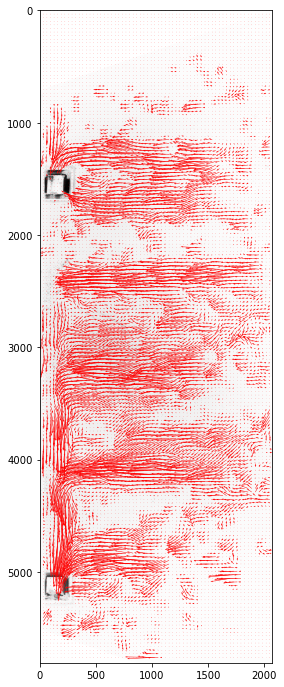

In [11]:
for i,f in enumerate(res_list):
    fig,ax = plt.subplots(figsize=(12,12))
    tools.display_vector_field(f, on_img=True, 
                           image_name = image_path / file_list[i], 
                           scaling_factor=1, 
                           scale=50, width=0.002,ax=ax,widim=True)
    fig.savefig(f'{str(f)[:-4]}.png',dpi=150)

# settings.frame_pattern_a = f1
# settings.frame_pattern_b = f2
# windef.piv(settings);

# for f1,f2 in zip(file_list[0:-1:2],file_list[1::2]):
#     settings.frame_pattern_a = f1
#     settings.frame_pattern_b = f2
#     windef.piv(settings);
    
#     fig,ax = plt.subplots(figsize=(12,6))
#     tools.display_vector_field(res_path/filename,on_img=True, 
#                            image_name = image_path / f1, 
#                            scaling_factor=1, 
#                            scale=300, width=0.0025,ax=ax)